# Medidas de tendencia central

Resumen informacion del conjunto de datos, en un solo numero

- Media (promedio)  // Suceptible a valores atipicos (outliers)
- Mediana (dato central)
- Moda (dato que mas se repite) // No aplica para datos numericos continuos
- Media ponderada
- Media armonica



<img src="https://static.platzi.com/media/user_upload/Screenshot_4-8b680ddc-98de-4392-8bd9-ceae687c85a4.jpg">

### Diagrama de frecuencias

<img src="https://static.platzi.com/media/user_upload/Untitled%20%281%29-6c9ab365-1d8c-4325-96ab-37f9687a2371.jpg">

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

edades = np.array([1,2,50,40,20,21,32,41,12,32,5,62,10,2,50,50,10,80])



In [3]:
# Frecuencias
pd.crosstab(index=edades, columns="count")

col_0,count
row_0,
1,1
2,2
5,1
10,2
12,1
20,1
21,1
32,2
40,1


In [ ]:
promedio = np.sum(edades)/len(edades)
round(promedio)

29.0

In [ ]:
#moda manual

repeticiones = 0
# For que valida cuantas veces se repite el mayor valor
for i in edades:
    apariciones = list(edades).count(i)
    if apariciones > repeticiones:
        repeticiones = apariciones

print('repecticions = ', repeticiones)
print('apariciones = ',apariciones)

#For que determinara cual de todos los repetidos es el que tenga o tiene mayor frecuecnia
modas = []
for i in edades:
    apariciones = list(edades).count(i)
    # Se verifica que solo los valores que sean iguales al numero mayor de repeticiones, se pushee al arreglo modas
    if apariciones == repeticiones and i not in modas:
        modas.append(i)

print("Modas = ", modas)        

repecticions =  3
apariciones =  3
Modas =  [50]


In [ ]:
#Mediana manual

# .sort(arreglo)  ordena el arreglo
edades = np.sort(edades) 
print('arreglo ordenado = ', edades)

cantidad_edades = len(edades)

if  cantidad_edades % 2 == 0:  # si es par
    mediana = (edades[int(cantidad_edades/2-1)] + edades[int(cantidad_edades/2)])/2
else:
    posicion = int((cantidad_edades + 1) / 2)
    mediana = edades[posicion]

print("Mediana = " , mediana)

arreglo ordenado =  [ 1  2  2  5 10 10 12 20 21 32 32 40 41 50 50 50 62 80]
Mediana =  26.5


In [4]:
#Con Numpy

media = np.mean(edades)
print("media = " , media)

mediana = np.median(edades)
print("mediana = ", mediana)

moda = pd.crosstab(index=edades, columns="count").to_numpy().max()   # .crosstab genera la agrupacion o la frecuencia absoluta
                                                                        # .to_numpy() convierte el datafram a arreglo numpy
                                                                         # max() obtiene el maximo valor
print("moda = ", moda)

media =  28.88888888888889
mediana =  26.5
moda =  3


In [ ]:
# Media ponderada  
# Ejemplo las notas de la universidad , ya que cada una vale cierto porcentaje

notas = np.array([5,3,2])
peso_notas = np.array([30,30,40])

nota_ponderada =sum(notas*peso_notas) / sum(peso_notas)
print("nota_ponderada = ", nota_ponderada)



nota_ponderada =  3.2


In [ ]:
# Media Geometrica


datos = np.array([32,45,67,43,28,17,48,95])


media_geometrica = np.prod(datos)**(1/len(datos))
print("media_geometrica =  ", media_geometrica)

media_geometrica =   -1674381312.0


In [ ]:
# Media armonica
# Es un promedio util cuando tenemos observaciones que se definien en relacion a una unidad

len(datos)/sum(1/datos)

36.77300793662041

# Ejemplo practico

In [6]:
import pandas as pd 

df = pd.read_csv('./data/cars.csv')
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [2]:
# Media

df['price_usd'].mean()

6639.971021255613

In [3]:
df['price_usd'].median()

4800.0

<AxesSubplot:ylabel='Frequency'>

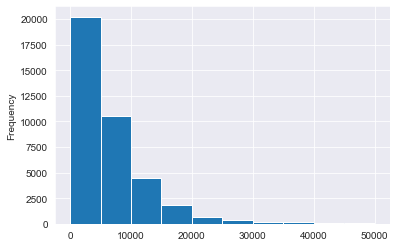

In [13]:
# Histograma ya que es un valor continuo
# bins = cantidad de divisiones  
df['price_usd'].plot.hist(bins=10)

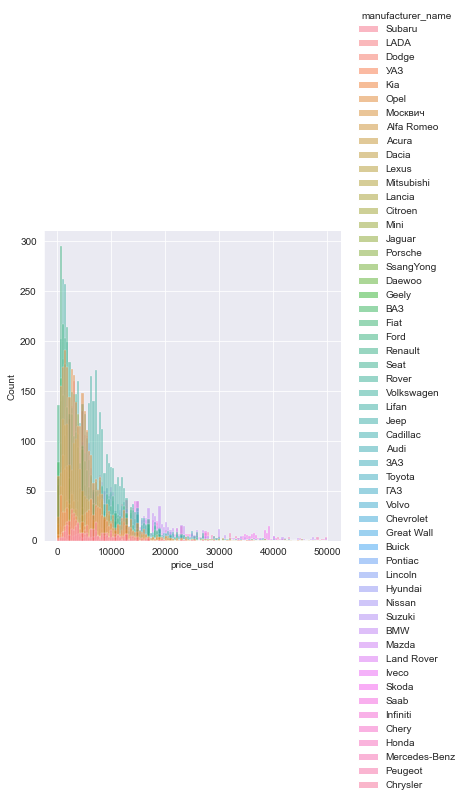

In [14]:
# x='price_usd' // Valor que tomara el histograma
# hue='mnufacturer_name' // Agrupacion para cada histograma 
sns.displot(df, x='price_usd', hue='manufacturer_name')

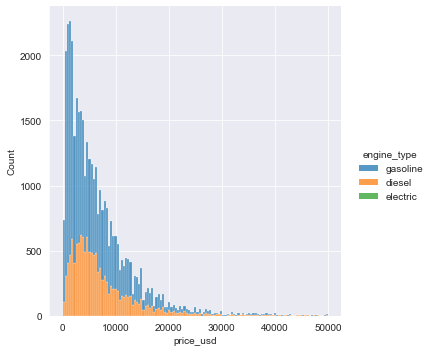

In [20]:
# x='price_usd' // Valor que tomara el histograma
# hue='engyne_type' // Agrupacion para cada histograma 
# multiple='stack' // Indica que se superponga 
sns.displot(df, x='price_usd', hue='engine_type', multiple='stack')

In [10]:
df.groupby(['engine_type']).count()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
engine_type,,,,,,,,,,,,,,,,,,,,,
diesel,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,...,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874
electric,10,10,10,10,10,10,10,10,0,10,...,10,10,10,10,10,10,10,10,10,10
gasoline,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,...,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647


In [17]:
# Filtrando el df, aplicando 2 condicionales
Q7_df = df[(df['manufacturer_name']=='Audi') & (df['model_name']=='Q7')]
Q7_df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
19515,Audi,Q7,automatic,grey,275000,2007,diesel,False,diesel,3.0,...,False,False,False,False,False,False,False,False,False,21
19547,Audi,Q7,automatic,white,105000,2014,diesel,False,diesel,3.0,...,True,True,True,True,True,True,True,True,True,216
19559,Audi,Q7,automatic,other,170000,2006,diesel,False,diesel,3.0,...,True,True,True,True,True,False,True,False,True,24
19574,Audi,Q7,automatic,black,185000,2016,diesel,False,diesel,3.0,...,False,False,True,True,True,True,True,True,True,7
19583,Audi,Q7,automatic,other,210000,2010,diesel,False,diesel,4.2,...,True,True,True,False,True,True,True,True,True,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21756,Audi,Q7,automatic,silver,200000,2008,gasoline,False,gasoline,3.6,...,True,True,True,True,True,True,True,True,True,91
21812,Audi,Q7,automatic,black,276000,2008,diesel,False,diesel,4.2,...,True,True,True,True,True,True,True,True,True,115
21873,Audi,Q7,automatic,black,273000,2006,gasoline,False,gasoline,4.2,...,True,True,False,True,True,True,True,False,True,147
21900,Audi,Q7,automatic,white,283000,2007,diesel,False,diesel,4.2,...,True,True,True,True,True,True,True,True,True,159


<AxesSubplot:xlabel='price_usd', ylabel='Count'>

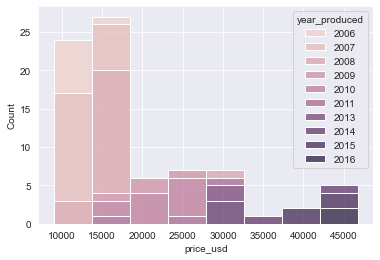

In [22]:
# Usando el histograma con Seaborn
# x='price_usd' // valores amostrar
# hue = 'year_produced // valor de agrupacion
sns.histplot(Q7_df, x='price_usd', hue = 'year_produced', multiple='stack')


# Colores mas claros, mas caros y mas actuales
# Colores oscuros mas antiguos y mas baratos